# Template of a SMI jupyter notebook

In [1]:
# These packages should all be installed if the procedure was followed
%pylab nbagg

import matplotlib.pyplot as plt

from smi_analysis import SMI_beamline
import numpy as np
import fabio
import os



import sys, os
SciAnalysis_PATH='/home/yuzhang/Repos/SciAnalysis/'
SciAnalysis_PATH in sys.path or sys.path.append(SciAnalysis_PATH)
from SciAnalysis.IO_HDF import dicttoh5, h5todict


Populating the interactive namespace from numpy and matplotlib


In [2]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Stitch_Scattering.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/IO.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/saxs.py



## Experimental configuration

In [3]:
geometry = 'Transmission'
energy = 16.1
wav = 1E-10 * (12.398/energy)
bs_kind = None
det_ini_angle = np.deg2rad(0)
det_angle_step = np.deg2rad(0)
incident_angle = np.deg2rad(0)

#WAXS
detector_saxs = 'Pilatus1m'
#sdd_saxs = 5000
sdd_saxs = 1600

#center_saxs = [490., 556]
#bs_pos_saxs = [[491, 538]]

center_saxs = [450, 558]
bs_pos_saxs = [450, 538]


SMI_saxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                     detector = detector_saxs,
                                     sdd = sdd_saxs,
                                     wav = wav,
                                     alphai = incident_angle,
                                     center = center_saxs,
                                     bs_pos = bs_pos_saxs,
                                     det_ini_angle = det_ini_angle,
                                     det_angle_step = det_angle_step,
                                     bs_kind = bs_kind)

## Locate the files on your computer

In [4]:
#scat = 'WAXS'
#det = '300KW'

scat=  'SAXS'
det = '1M'
username = 'Dinca' 

inDir = '/home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/raw_data/%s/'%det
outDir0 = '/home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/'  
outDir0 = create_fullpath(  outDir0 )


Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/  already exists


In [5]:
flag_save = True 
outDir1 = create_dir(  '%s/%s/'%(username,scat), outDir0 )
outDir = create_dir(  'Results/', outDir1 )
create_dir( '%s/%s/Results/TIFF/'%(username,scat), outDir0  )
outDir_HDF =  create_dir(  '%s/HDF_Results/'%(username), outDir0 )

print( outDir )
print( outDir_HDF)


Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/SAXS/  already exists
Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/SAXS/Results/  already exists
Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/SAXS/Results/TIFF/  already exists
Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/HDF_Results/  already exists
/home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/SAXS/Results/
/home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/HDF_Results/


In [6]:
t_list = ls_dir( inDir, and_list=[ username ])

In [7]:
t_list

array(['Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.19_y-5249.93_sax1600.0m_1s_None_att_115163_sid_000001_SAXS.tif',
       'Dinca_S1_CuHHTT_Bare_x45147.64_y-4199.88_sax1600.0m_1s_Sn60X1_att_115161_sid_000001_SAXS.tif',
       'Dinca_S8_CuHHTT_TEPBF4_Neg_x548.73_y-4599.84_sax1600.0m_1s_None_att_115175_sid_000001_SAXS.tif',
       'Dinca_S7_CuHHTT_CsBr_Pos_x-5751.2_y-4849.92_sax1600.0m_1s_None_att_115173_sid_000001_SAXS.tif',
       'Dinca_S8_CuHHTT_TEPBF4_Neg_x548.76_y-4799.85_sax1600.0m_1s_Sn60X1_att_115174_sid_000001_SAXS.tif',
       'Dinca_S1_CuHHTT_Bare_x45147.65_y-4399.91_sax1600.0m_1s_None_att_115160_sid_000001_SAXS.tif',
       'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.94_y-5198.87_sax1600.0m_1s_Sn60X1_att_115164_sid_000001_SAXS.tif',
       'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.08_y-5298.95_sax1600.0m_1s_Sn60X1_att_115166_sid_000001_SAXS.tif',
       'Dinca_S11_NiBHT_Bare_x19598.13_y-4400.04_sax1600.0m_1s_None_att_115181_sid_000001_SAXS.tif',
       'Dinca_S6_CuHHTT_KNO2_Pos_x-12200.8_y-4

In [8]:
sam_dict, sams = get_Unique_SamDict_from_list( t_list, cut_pattern= r'[_][x]', starting_point=0,     )   
ks =  sorted(list(sams.keys()))


In [9]:
sams

{'Dinca_S2_CuHHTT_TEPBF4_Soaked': 2,
 'Dinca_S1_CuHHTT_Bare': 2,
 'Dinca_S8_CuHHTT_TEPBF4_Neg': 2,
 'Dinca_S7_CuHHTT_CsBr_Pos': 2,
 'Dinca_S3_CuHHTT_KNO2_Soaked': 2,
 'Dinca_S4_CuHHTT_CsBr_Soaked': 2,
 'Dinca_S11_NiBHT_Bare': 2,
 'Dinca_S6_CuHHTT_KNO2_Pos': 2,
 'Dinca_S10_CuHHTT_CsBr_Neg': 2,
 'Dinca_S5_CuHHTT_TEPBF4_Pos': 2,
 'Dinca_S9_CuHHTT_KNO2_Neg': 2}

In [10]:
ks

['Dinca_S10_CuHHTT_CsBr_Neg',
 'Dinca_S11_NiBHT_Bare',
 'Dinca_S1_CuHHTT_Bare',
 'Dinca_S2_CuHHTT_TEPBF4_Soaked',
 'Dinca_S3_CuHHTT_KNO2_Soaked',
 'Dinca_S4_CuHHTT_CsBr_Soaked',
 'Dinca_S5_CuHHTT_TEPBF4_Pos',
 'Dinca_S6_CuHHTT_KNO2_Pos',
 'Dinca_S7_CuHHTT_CsBr_Pos',
 'Dinca_S8_CuHHTT_TEPBF4_Neg',
 'Dinca_S9_CuHHTT_KNO2_Neg']

In [11]:
ki = 2
sam = ks[ki]
print( 'The sample is: %s.'%sam)
flist = sam_dict[ sam ]
print(len(flist))
print(flist)

The sample is: Dinca_S1_CuHHTT_Bare.
2
['Dinca_S1_CuHHTT_Bare_x45147.64_y-4199.88_sax1600.0m_1s_Sn60X1_att_115161_sid_000001_SAXS.tif', 'Dinca_S1_CuHHTT_Bare_x45147.65_y-4399.91_sax1600.0m_1s_None_att_115160_sid_000001_SAXS.tif']


In [12]:
sflistd = sort_fnlist( flist, pattern='115', lsid = 6 , method='contain' )
sflist = np.array( list(sflistd.values()) )
print('The filename list for this sam=%s are:\n %s.'%(sam, sflist ))

The filename list for this sam=Dinca_S1_CuHHTT_Bare are:
 ['Dinca_S1_CuHHTT_Bare_x45147.65_y-4399.91_sax1600.0m_1s_None_att_115160_sid_000001_SAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45147.64_y-4199.88_sax1600.0m_1s_Sn60X1_att_115161_sid_000001_SAXS.tif'].


## Sort our the filenames

In [13]:
ssam_dict = {}
for sam in ks:     
    print( 'The sample is: %s.'%sam)
    flist = sam_dict[ sam ]
    sflistd = sort_fnlist( flist, pattern='115', lsid = 6 , method='contain' )
    sflist = np.array( list(sflistd.values()) )
    print('The filename list for this sam=%s are:\n %s.'%(sam, sflist ))
    ssam_dict[ sam ] = sflist

The sample is: Dinca_S10_CuHHTT_CsBr_Neg.
The filename list for this sam=Dinca_S10_CuHHTT_CsBr_Neg are:
 ['Dinca_S10_CuHHTT_CsBr_Neg_x13298.33_y-4699.97_sax1600.0m_1s_Sn60X1_att_115178_sid_000001_SAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13298.33_y-4499.98_sax1600.0m_1s_None_att_115179_sid_000001_SAXS.tif'].
The sample is: Dinca_S11_NiBHT_Bare.
The filename list for this sam=Dinca_S11_NiBHT_Bare are:
 ['Dinca_S11_NiBHT_Bare_x19598.13_y-4600.04_sax1600.0m_1s_Sn60X1_att_115180_sid_000001_SAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19598.13_y-4400.04_sax1600.0m_1s_None_att_115181_sid_000001_SAXS.tif'].
The sample is: Dinca_S1_CuHHTT_Bare.
The filename list for this sam=Dinca_S1_CuHHTT_Bare are:
 ['Dinca_S1_CuHHTT_Bare_x45147.65_y-4399.91_sax1600.0m_1s_None_att_115160_sid_000001_SAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45147.64_y-4199.88_sax1600.0m_1s_Sn60X1_att_115161_sid_000001_SAXS.tif'].
The sample is: Dinca_S2_CuHHTT_TEPBF4_Soaked.
The filename list for this sam=Dinca_S2_CuHHTT_TEPBF4_Soaked are:
 ['Dinc

In [14]:
ks

['Dinca_S10_CuHHTT_CsBr_Neg',
 'Dinca_S11_NiBHT_Bare',
 'Dinca_S1_CuHHTT_Bare',
 'Dinca_S2_CuHHTT_TEPBF4_Soaked',
 'Dinca_S3_CuHHTT_KNO2_Soaked',
 'Dinca_S4_CuHHTT_CsBr_Soaked',
 'Dinca_S5_CuHHTT_TEPBF4_Pos',
 'Dinca_S6_CuHHTT_KNO2_Pos',
 'Dinca_S7_CuHHTT_CsBr_Pos',
 'Dinca_S8_CuHHTT_TEPBF4_Neg',
 'Dinca_S9_CuHHTT_KNO2_Neg']

## D0 circular average

In [15]:
show_raw = False
make_cake = False
#flag_save = False

In [16]:
ssam_dict ['Dinca_S1_CuHHTT_Bare']

array(['Dinca_S1_CuHHTT_Bare_x45147.65_y-4399.91_sax1600.0m_1s_None_att_115160_sid_000001_SAXS.tif',
       'Dinca_S1_CuHHTT_Bare_x45147.64_y-4199.88_sax1600.0m_1s_Sn60X1_att_115161_sid_000001_SAXS.tif'],
      dtype='<U92')

In [17]:
%matplotlib inline

In [18]:
#for sam in ks[:]:
#for samk in ks[:]:    
for samk in ks[2:3]:     
    data = ssam_dict[samk]
    print( 'The sample is: %s.'%samk)
    print('The filename list for this sam=%s are:\n %s.'%(samk, data )) 
    for i, dat in enumerate( data ):   
        print( i, dat )
        #sam = samk + '_%03d'%i
        sam = dat

The sample is: Dinca_S1_CuHHTT_Bare.
The filename list for this sam=Dinca_S1_CuHHTT_Bare are:
 ['Dinca_S1_CuHHTT_Bare_x45147.65_y-4399.91_sax1600.0m_1s_None_att_115160_sid_000001_SAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45147.64_y-4199.88_sax1600.0m_1s_Sn60X1_att_115161_sid_000001_SAXS.tif'].
0 Dinca_S1_CuHHTT_Bare_x45147.65_y-4399.91_sax1600.0m_1s_None_att_115160_sid_000001_SAXS.tif
1 Dinca_S1_CuHHTT_Bare_x45147.64_y-4199.88_sax1600.0m_1s_Sn60X1_att_115161_sid_000001_SAXS.tif


The sample is: Dinca_S10_CuHHTT_CsBr_Neg.
The filename list for this sam=Dinca_S10_CuHHTT_CsBr_Neg are:
 ['Dinca_S10_CuHHTT_CsBr_Neg_x13298.33_y-4699.97_sax1600.0m_1s_Sn60X1_att_115178_sid_000001_SAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13298.33_y-4499.98_sax1600.0m_1s_None_att_115179_sid_000001_SAXS.tif'].
0 Dinca_S10_CuHHTT_CsBr_Neg_x13298.33_y-4699.97_sax1600.0m_1s_Sn60X1_att_115178_sid_000001_SAXS.tif


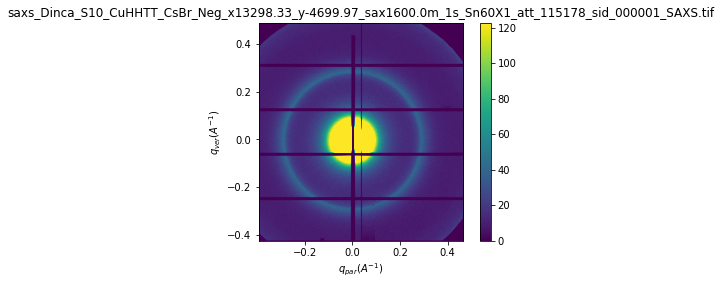

<Figure size 432x288 with 0 Axes>

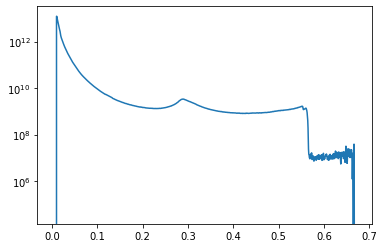

1 Dinca_S10_CuHHTT_CsBr_Neg_x13298.33_y-4499.98_sax1600.0m_1s_None_att_115179_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

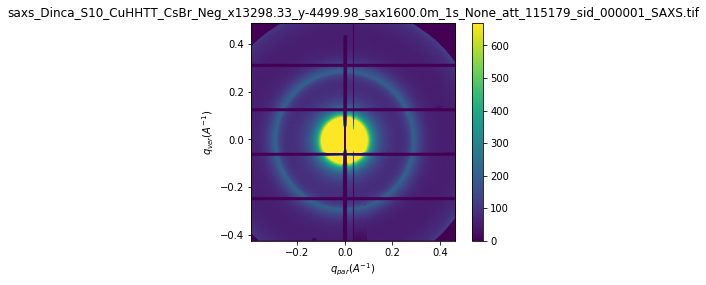

<Figure size 432x288 with 0 Axes>

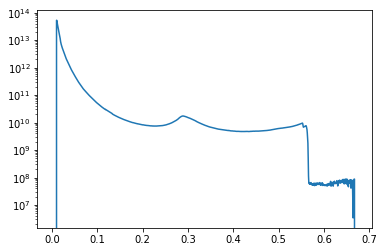

Done
The sample is: Dinca_S11_NiBHT_Bare.
The filename list for this sam=Dinca_S11_NiBHT_Bare are:
 ['Dinca_S11_NiBHT_Bare_x19598.13_y-4600.04_sax1600.0m_1s_Sn60X1_att_115180_sid_000001_SAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19598.13_y-4400.04_sax1600.0m_1s_None_att_115181_sid_000001_SAXS.tif'].
0 Dinca_S11_NiBHT_Bare_x19598.13_y-4600.04_sax1600.0m_1s_Sn60X1_att_115180_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

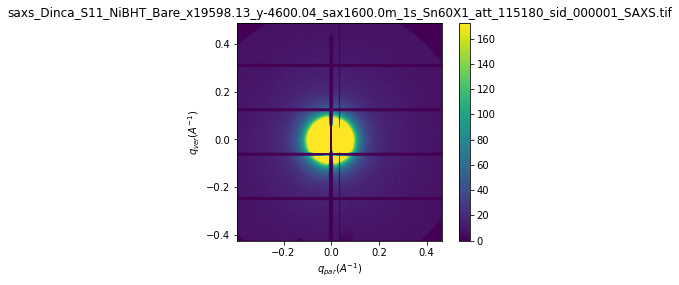

<Figure size 432x288 with 0 Axes>

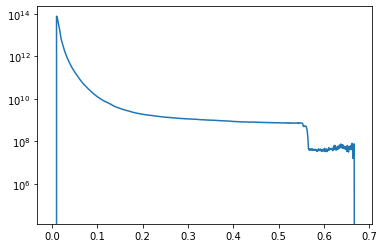

1 Dinca_S11_NiBHT_Bare_x19598.13_y-4400.04_sax1600.0m_1s_None_att_115181_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

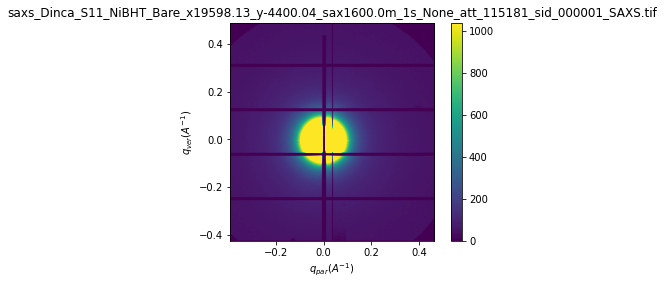

<Figure size 432x288 with 0 Axes>

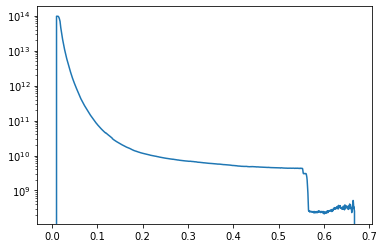

Done
The sample is: Dinca_S1_CuHHTT_Bare.
The filename list for this sam=Dinca_S1_CuHHTT_Bare are:
 ['Dinca_S1_CuHHTT_Bare_x45147.65_y-4399.91_sax1600.0m_1s_None_att_115160_sid_000001_SAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45147.64_y-4199.88_sax1600.0m_1s_Sn60X1_att_115161_sid_000001_SAXS.tif'].
0 Dinca_S1_CuHHTT_Bare_x45147.65_y-4399.91_sax1600.0m_1s_None_att_115160_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

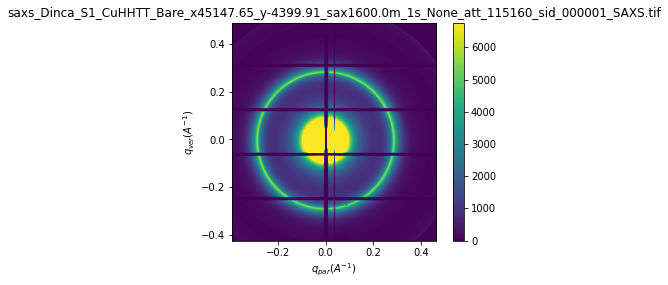

<Figure size 432x288 with 0 Axes>

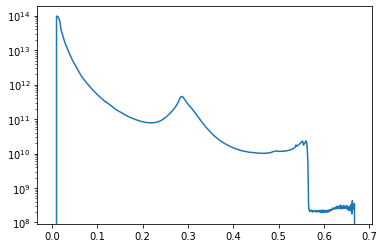

1 Dinca_S1_CuHHTT_Bare_x45147.64_y-4199.88_sax1600.0m_1s_Sn60X1_att_115161_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

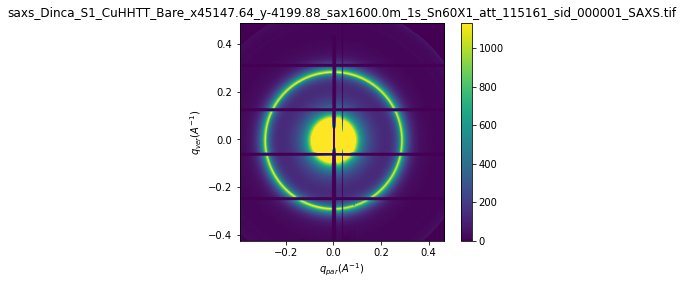

<Figure size 432x288 with 0 Axes>

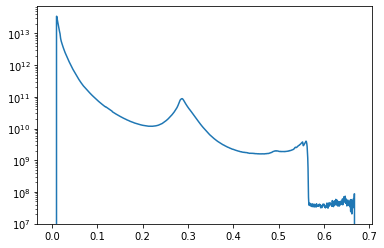

Done
The sample is: Dinca_S2_CuHHTT_TEPBF4_Soaked.
The filename list for this sam=Dinca_S2_CuHHTT_TEPBF4_Soaked are:
 ['Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.36_y-5449.92_sax1600.0m_1s_Sn60X1_att_115162_sid_000001_SAXS.tif'
 'Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.19_y-5249.93_sax1600.0m_1s_None_att_115163_sid_000001_SAXS.tif'].
0 Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.36_y-5449.92_sax1600.0m_1s_Sn60X1_att_115162_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

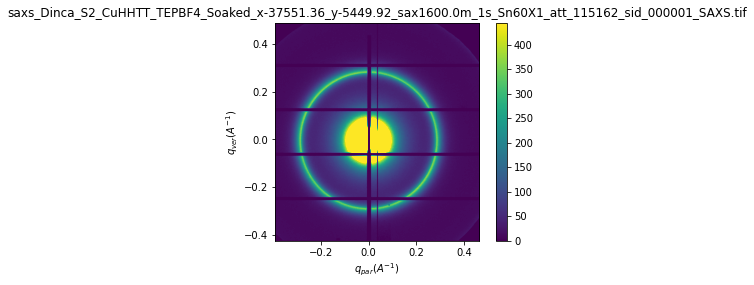

<Figure size 432x288 with 0 Axes>

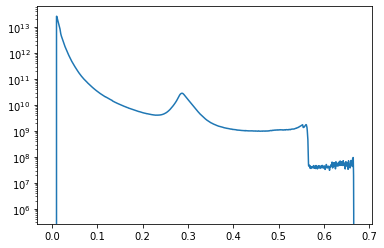

1 Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.19_y-5249.93_sax1600.0m_1s_None_att_115163_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

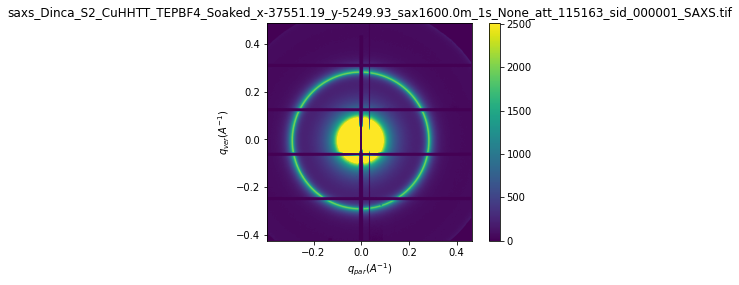

<Figure size 432x288 with 0 Axes>

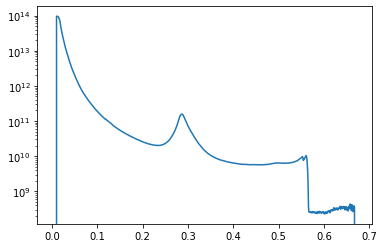

Done
The sample is: Dinca_S3_CuHHTT_KNO2_Soaked.
The filename list for this sam=Dinca_S3_CuHHTT_KNO2_Soaked are:
 ['Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.94_y-5198.87_sax1600.0m_1s_Sn60X1_att_115164_sid_000001_SAXS.tif'
 'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.93_y-4998.86_sax1600.0m_1s_None_att_115165_sid_000001_SAXS.tif'].
0 Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.94_y-5198.87_sax1600.0m_1s_Sn60X1_att_115164_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

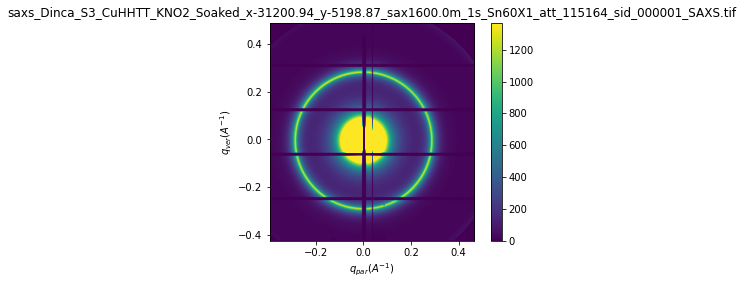

<Figure size 432x288 with 0 Axes>

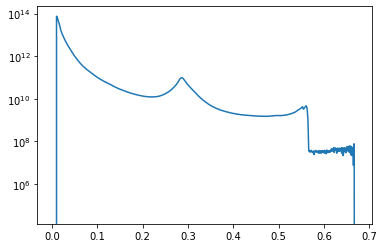

1 Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.93_y-4998.86_sax1600.0m_1s_None_att_115165_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

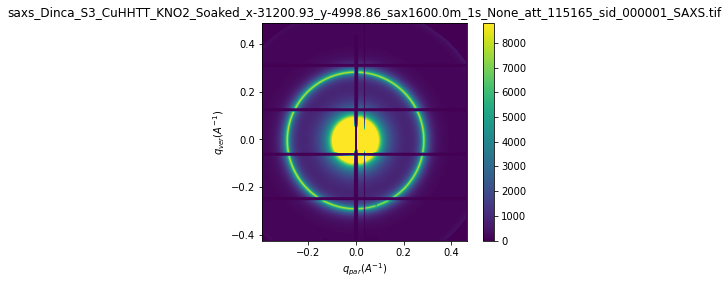

<Figure size 432x288 with 0 Axes>

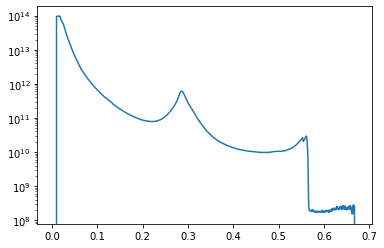

Done
The sample is: Dinca_S4_CuHHTT_CsBr_Soaked.
The filename list for this sam=Dinca_S4_CuHHTT_CsBr_Soaked are:
 ['Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.08_y-5298.95_sax1600.0m_1s_Sn60X1_att_115166_sid_000001_SAXS.tif'
 'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.08_y-5098.95_sax1600.0m_1s_None_att_115167_sid_000001_SAXS.tif'].
0 Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.08_y-5298.95_sax1600.0m_1s_Sn60X1_att_115166_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

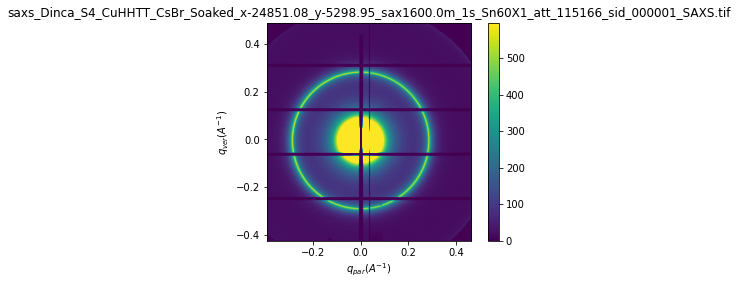

<Figure size 432x288 with 0 Axes>

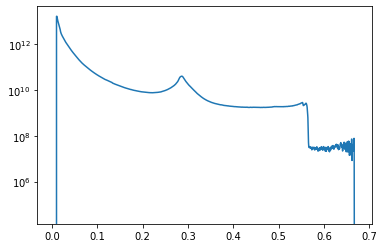

1 Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.08_y-5098.95_sax1600.0m_1s_None_att_115167_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

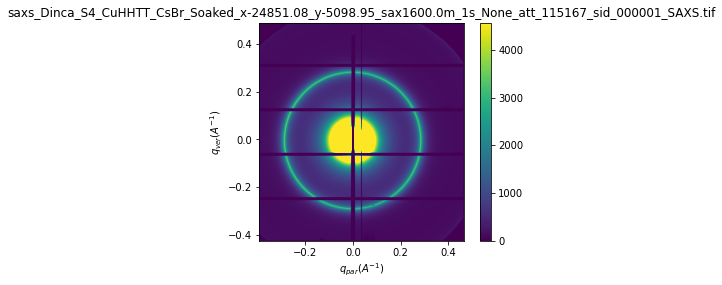

<Figure size 432x288 with 0 Axes>

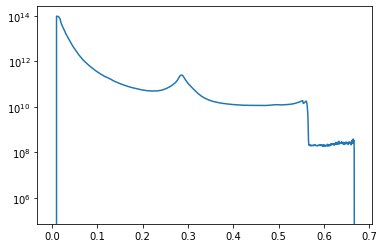

Done
The sample is: Dinca_S5_CuHHTT_TEPBF4_Pos.
The filename list for this sam=Dinca_S5_CuHHTT_TEPBF4_Pos are:
 ['Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.81_y-5049.94_sax1600.0m_1s_Sn60X1_att_115168_sid_000001_SAXS.tif'
 'Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.83_y-4849.95_sax1600.0m_1s_None_att_115169_sid_000001_SAXS.tif'].
0 Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.81_y-5049.94_sax1600.0m_1s_Sn60X1_att_115168_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

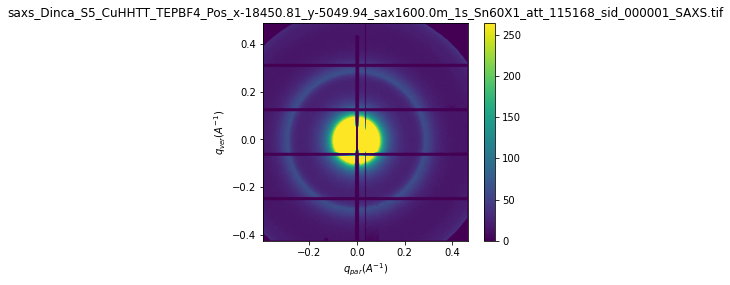

<Figure size 432x288 with 0 Axes>

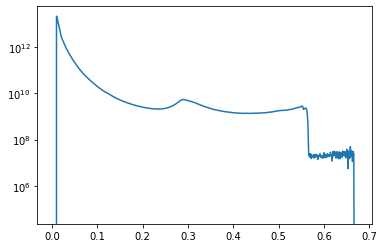

1 Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.83_y-4849.95_sax1600.0m_1s_None_att_115169_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

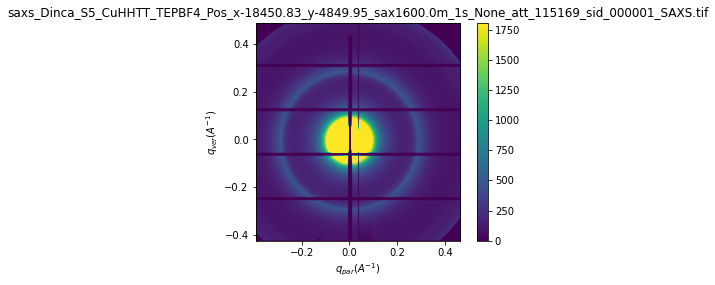

<Figure size 432x288 with 0 Axes>

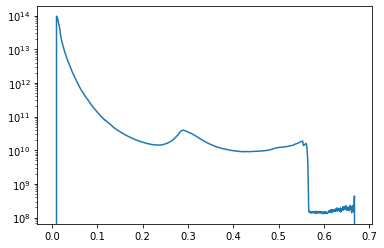

Done
The sample is: Dinca_S6_CuHHTT_KNO2_Pos.
The filename list for this sam=Dinca_S6_CuHHTT_KNO2_Pos are:
 ['Dinca_S6_CuHHTT_KNO2_Pos_x-12200.8_y-4999.92_sax1600.0m_1s_Sn60X1_att_115170_sid_000001_SAXS.tif'
 'Dinca_S6_CuHHTT_KNO2_Pos_x-12200.81_y-4799.93_sax1600.0m_1s_None_att_115171_sid_000001_SAXS.tif'].
0 Dinca_S6_CuHHTT_KNO2_Pos_x-12200.8_y-4999.92_sax1600.0m_1s_Sn60X1_att_115170_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

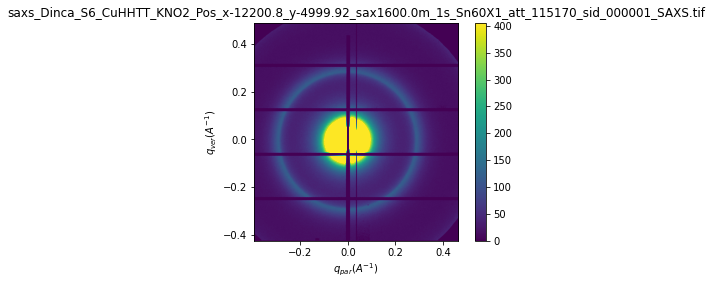

<Figure size 432x288 with 0 Axes>

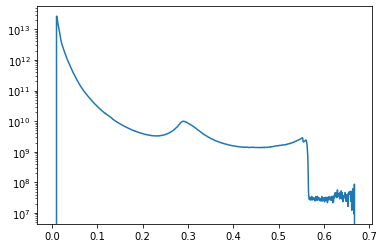

1 Dinca_S6_CuHHTT_KNO2_Pos_x-12200.81_y-4799.93_sax1600.0m_1s_None_att_115171_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

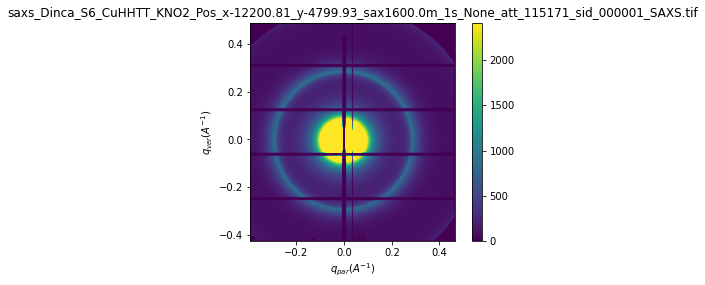

<Figure size 432x288 with 0 Axes>

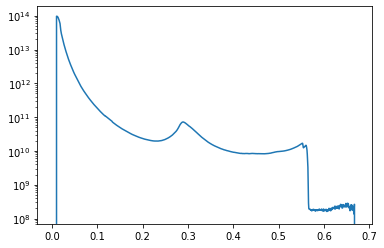

Done
The sample is: Dinca_S7_CuHHTT_CsBr_Pos.
The filename list for this sam=Dinca_S7_CuHHTT_CsBr_Pos are:
 ['Dinca_S7_CuHHTT_CsBr_Pos_x-5751.19_y-5049.93_sax1600.0m_1s_Sn60X1_att_115172_sid_000001_SAXS.tif'
 'Dinca_S7_CuHHTT_CsBr_Pos_x-5751.2_y-4849.92_sax1600.0m_1s_None_att_115173_sid_000001_SAXS.tif'].
0 Dinca_S7_CuHHTT_CsBr_Pos_x-5751.19_y-5049.93_sax1600.0m_1s_Sn60X1_att_115172_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

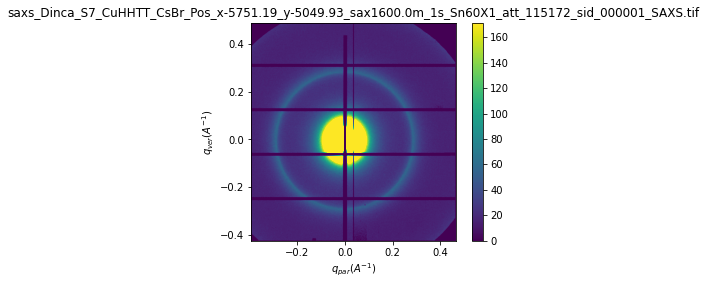

<Figure size 432x288 with 0 Axes>

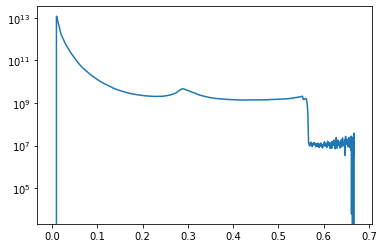

1 Dinca_S7_CuHHTT_CsBr_Pos_x-5751.2_y-4849.92_sax1600.0m_1s_None_att_115173_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

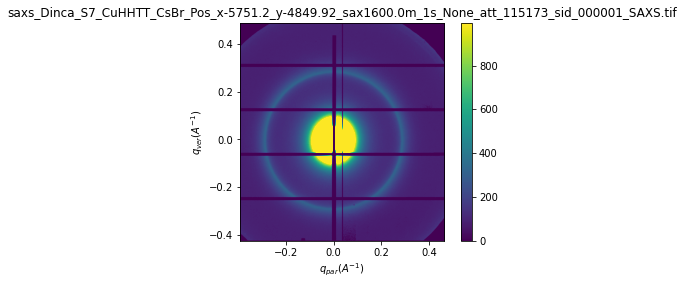

<Figure size 432x288 with 0 Axes>

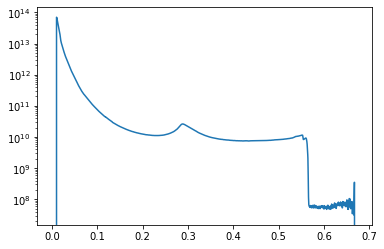

Done
The sample is: Dinca_S8_CuHHTT_TEPBF4_Neg.
The filename list for this sam=Dinca_S8_CuHHTT_TEPBF4_Neg are:
 ['Dinca_S8_CuHHTT_TEPBF4_Neg_x548.76_y-4799.85_sax1600.0m_1s_Sn60X1_att_115174_sid_000001_SAXS.tif'
 'Dinca_S8_CuHHTT_TEPBF4_Neg_x548.73_y-4599.84_sax1600.0m_1s_None_att_115175_sid_000001_SAXS.tif'].
0 Dinca_S8_CuHHTT_TEPBF4_Neg_x548.76_y-4799.85_sax1600.0m_1s_Sn60X1_att_115174_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

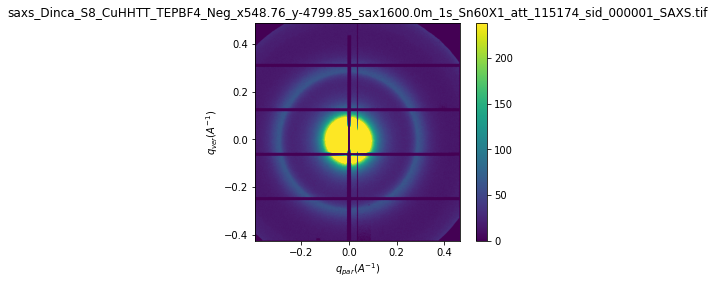

<Figure size 432x288 with 0 Axes>

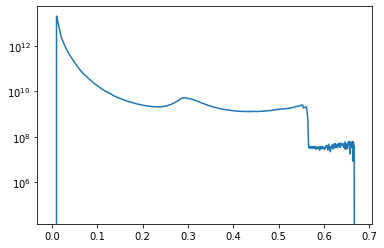

1 Dinca_S8_CuHHTT_TEPBF4_Neg_x548.73_y-4599.84_sax1600.0m_1s_None_att_115175_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

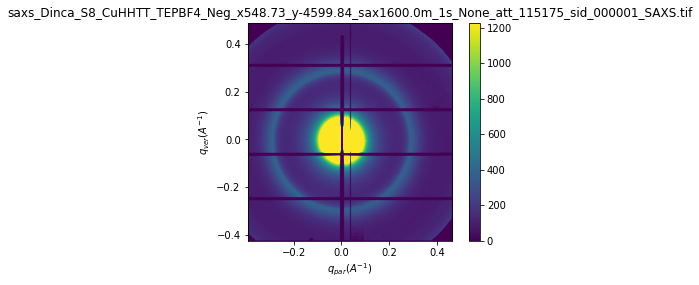

<Figure size 432x288 with 0 Axes>

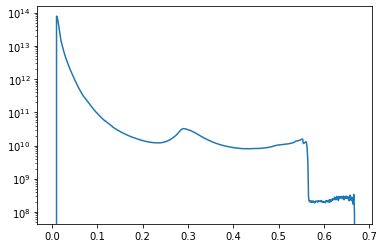

Done
The sample is: Dinca_S9_CuHHTT_KNO2_Neg.
The filename list for this sam=Dinca_S9_CuHHTT_KNO2_Neg are:
 ['Dinca_S9_CuHHTT_KNO2_Neg_x6948.48_y-4799.89_sax1600.0m_1s_Sn60X1_att_115176_sid_000001_SAXS.tif'
 'Dinca_S9_CuHHTT_KNO2_Neg_x6948.46_y-4599.89_sax1600.0m_1s_None_att_115177_sid_000001_SAXS.tif'].
0 Dinca_S9_CuHHTT_KNO2_Neg_x6948.48_y-4799.89_sax1600.0m_1s_Sn60X1_att_115176_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

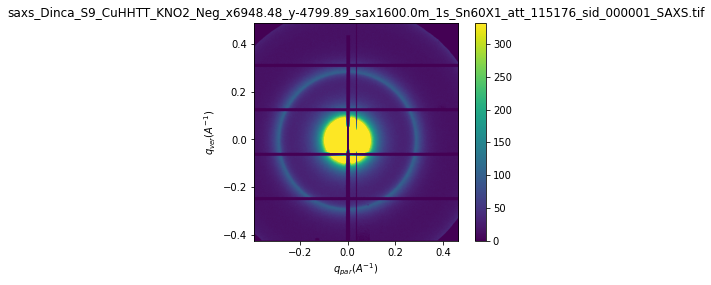

<Figure size 432x288 with 0 Axes>

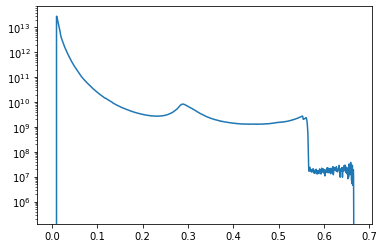

1 Dinca_S9_CuHHTT_KNO2_Neg_x6948.46_y-4599.89_sax1600.0m_1s_None_att_115177_sid_000001_SAXS.tif


<Figure size 432x288 with 0 Axes>

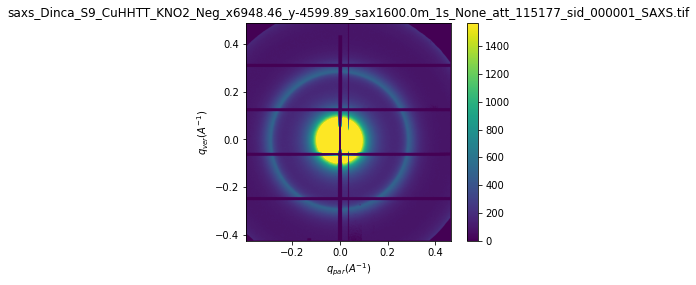

<Figure size 432x288 with 0 Axes>

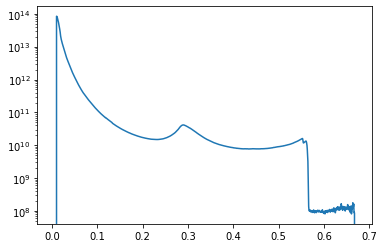

Done


<Figure size 432x288 with 0 Axes>

In [22]:
#for sam in ks[:]:
for samk in ks[:]:    
#for samk in ks[2:3]:     
    data = ssam_dict[samk]
    print( 'The sample is: %s.'%samk)
    print('The filename list for this sam=%s are:\n %s.'%(samk, data )) 
    for i, dat in enumerate( data ):   
        print( i, dat )
        #sam = samk + '_%03d'%i
        sam = dat
        SMI_saxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                             detector = detector_saxs,
                                             sdd = sdd_saxs,
                                             wav = wav,
                                             alphai = incident_angle,
                                             center = center_saxs,
                                             bs_pos = bs_pos_saxs,
                                             det_ini_angle = det_ini_angle,
                                             det_angle_step = det_angle_step,
                                             bs_kind = bs_kind)

        SMI_saxs.open_data( inDir, [dat])
        img = fabio.open(os.path.join( inDir, dat)).data

        if show_raw:
            plt.figure()
            plt.imshow(img,
                   vmin = 0,
                   vmax =np.percentile(img, 99))
            plt.show()
            plt.savefig( outDir + sam +'_raw_saxs.png')
            
        SMI_saxs.imgs[0] = img        
        SMI_saxs.stitching_data()
        
        plt.figure()
        plt.imshow(SMI_saxs.img_st,
                   extent=[SMI_saxs.qp[0], SMI_saxs.qp[-1], SMI_saxs.qz[0], SMI_saxs.qz[-1]],
                   vmin = 0,
                   vmax = np.percentile(SMI_saxs.img_st, 97))    
        plt.title('saxs_%s'%sam)
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$q_{ver}(A^{-1})$')
        plt.colorbar()
        plt.show()
        plt.savefig( outDir + sam +'_q_map_saxs.png')

        if make_cake:
            SMI_saxs.caking()
            plt.figure()
            plt.imshow(np.log(SMI_saxs.cake)[::-1], origin = 'lower',
                       extent=[SMI_saxs.q_cake[0], SMI_saxs.q_cake[-1], SMI_saxs.chi_cake[0], SMI_saxs.chi_cake[-1]],
                       aspect = abs(SMI_saxs.q_cake[0] - SMI_saxs.q_cake[-1])/abs(SMI_saxs.chi_cake[0]- SMI_saxs.chi_cake[-1])
                      )    
            plt.title('saxs_%s'%sam)
            plt.xlabel('$q_{par}(A^{-1})$')
            plt.ylabel('$angle\ (deg) $')
            plt.colorbar()
            plt.show()
            plt.savefig( outDir + sam +'_cake_saxs.png')



        SMI_saxs.radial_averaging(azimuth_range=[-179, 179], npt=2000)
        q0, I0 = SMI_saxs.q_rad, SMI_saxs.I_rad
        tth = np.rad2deg(2*np.arcsin(1E10 * SMI_saxs.q_rad*wav/(4*np.pi)))           
        plt.figure()
        plt.plot(SMI_saxs.q_rad, SMI_saxs.I_rad)
        plt.yscale('log')
        plt.show()
        plt.savefig( outDir + sam +'_q_Iq_saxs.png')

        if flag_save:

            #Save the stitched image as a tiff
            fabio.tifimage.TifImage(np.nan_to_num(SMI_saxs.img_st).astype(np.float64)).write(os.path.join(outDir,'q_map_data_%s_saxs.tiff'%sam)) 
            #Save the qx and qy as an 1D array
            np.savetxt(os.path.join(outDir, 'qpar_%s_saxs.txt'%sam), np.linspace(SMI_saxs.qp[0], SMI_saxs.qp[-1], np.shape(SMI_saxs.img_st)[1]))
            np.savetxt(os.path.join(outDir, 'qver_%s_saxs.txt'%sam), np.linspace(SMI_saxs.qz[0], SMI_saxs.qz[-1], np.shape(SMI_saxs.img_st)[0])) 

            if make_cake:
                np.savetxt(os.path.join(outDir, 'qpolar_map_%s_saxs.txt'%sam), np.linspace(SMI_saxs.q_cake[0], SMI_saxs.q_cake[-1], np.shape(SMI_saxs.cake)[1]))
                np.savetxt(os.path.join(outDir, 'chipolar_map_%s_saxs.txt'%sam), np.linspace(SMI_saxs.chi_cake[0], SMI_saxs.chi_cake[-1], np.shape(SMI_saxs.cake)[0])) 
                fabio.tifimage.TifImage(np.nan_to_num(SMI_saxs.cake).astype(np.float64)).write(os.path.join(outDir, 'TIFF/polar_map_%s_saxs.tiff'%sam)) 
              #Save the sum image as a tiff
            np.savetxt(os.path.join( outDir, 'Radint_%s_saxs.txt'%sam), np.vstack((SMI_saxs.q_rad, SMI_saxs.I_rad)).T)

            if True:  
                if i ==0:
                    Res = {}                        
                res = {}
                k = 'raw'
                res[k]={}
                res[k]['data'] = np.nan_to_num(img).astype(np.int64)
                res[k]['label'] = 'raw data'

                k = 'qmap'
                res[k]={}
                res[k]['data'] =  np.nan_to_num(SMI_saxs.img_st).astype(np.float64)[::-1]
                res[k]['label'] = 'qmap'
                res[k]['qpar'] =  np.linspace(SMI_saxs.qp[0], SMI_saxs.qp[-1], np.shape(SMI_saxs.img_st)[1])
                res[k]['qver'] =  np.linspace(SMI_saxs.qz[0], SMI_saxs.qz[-1], np.shape(SMI_saxs.img_st)[0])            

                if make_cake:
                    k = 'qpolar'
                    res[k]={}
                    res[k]['data'] =  np.nan_to_num(SMI_saxs.cake).astype(np.uint64)[::-1]
                    res[k]['label'] = 'qpolar'           
                    q_polar =  np.linspace(SMI_saxs.q_cake[0], SMI_saxs.q_cake[-1], np.shape(SMI_saxs.cake)[1])
                    ang_polar = np.linspace( SMI_saxs.chi_cake[0], SMI_saxs.chi_cake[-1], np.shape(SMI_saxs.cake)[0]) 
                    res[k]['q_polar'] = q_polar
                    res[k]['ang_polar'] = ang_polar                

                k= 'circular average'
                res[k]={}
                res[k]['data'] =  np.vstack((SMI_saxs.q_rad, tth, SMI_saxs.I_rad)).T
                res[k]['label'] = [ 'q', 'angle', 'Iq' ]
                Res[ sam ] = res
        if flag_save:
            dicttoh5( Res, os.path.join(outDir_HDF, '%s.h5'%samk) ,  h5path='/SAXS/', mode='a',overwrite_data=True)

    print('Done')

In [20]:
#test_res = h5todict( os.path.join(outDir_HDF, '%s.h5'%sa) )
#test_res.keys()